Tugas ini berupa Tugas Akhir yang diselesaikan pada Akhir Pekan 8. Tugas disusun sesuai dengan materi yang diberikan tiap harinya dari pekan 1-8.

# Dataset

silahkan unduh dataset berikut untuk mengerjakan Tugas Akhir:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('pelanggan_supermarket.csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Soal 1. Statistika Deskriptif

lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [3]:
#code here

df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)

Give your analysis:



---
df.describe() mencerminkan kondisi deskriptif pada data. Terlihat beberapa gambaran statistika deskriptif pada data *pelanggan_supermarket* sebagai berikut.

---
1. Berdasarkan **count** *ID_pelanggan* dan *Pendapatan pertahun (juta)*, total data pada tiap kolom adalah 250. Artinya terdapat 250 pelanggan yang tercakup dalam data tersebut. Kondisi 245 data pada *Umur* dan 246 pada pada *Skor Belanja (1-100)* cukup menjelaskan bahwa terdapat **missing value** pada kolom tersebut.
2. Pada point **mean** hingga **max** sebenarnya tidak tepat menggambarkan kondisi *ID_Pelanggan*, sebab data pada *ID_Pelanggan* bertipe kategorikal, yakni data  nominal.
3. Sedangkan, pada kolom *Umur* dan *Skor Belanja (1-100)* tampak keanehan pada baris **max**. Terdapat nilai **max** umur pelanggan paling tua adalah  120 tahun. Perlu dipertanyakan, *apakah seorang berusia 120 tahun masih mampu berbelanja ke supermarket?* Selanjutnya, keanehan data juga terjadi pada baris **max** kolom *Skor Belanja (1-100)*. Sebab, dari range skor 1-100, terdapat nilai 150. *Apakah terjadi kesalahan pencatatan ketika melakukan survei?* Keanehan-keanehan ini dapat dikategorikan sebagai data **outlier**.

---
Ketiga poin tersebut cukup disimpulkan bahwa pada data terdapat nilai **missing  value** dan **outlier** pada data **pelanggan_supermarket** yang jika dibiarkan akan mempengaruhi analisa yang dihasilkan. Oleh sebab itu, dua masalah ini perlu diatasi terlebih dahulu.


---


# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull(). 

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [4]:
# Hitunglah jumlah missing value menggunakan methode .isnull()

jumlah_missing = df.isnull().sum()
jumlah_missing


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [5]:
# Isi nilai nan dengan nilai sebelumnya di row tersebut.

# Gunakan method .fillna() dengan argument method bernilai 'ffill'
handling_missing = df.fillna(method='ffill')

# Periksa kembali apakah missing value berhasil diatasi
jumlah_missing = handling_missing.isnull().sum()
jumlah_missing

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64



---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. simpan data hasil handling outlier ke dalam variabel df2
4. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

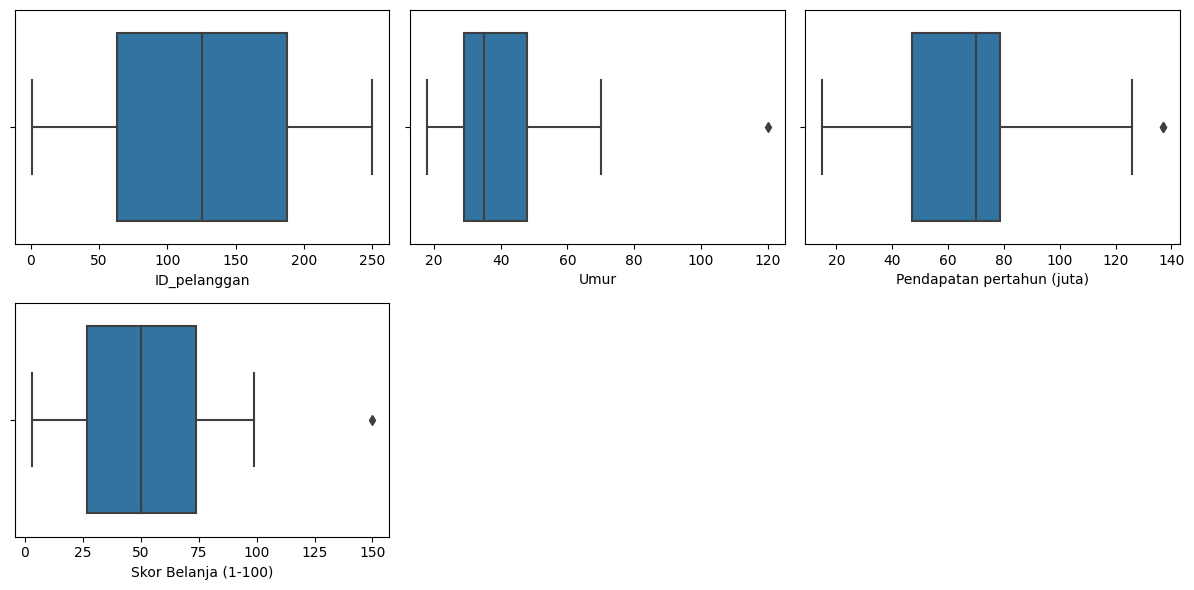

In [6]:
# 1. Periksa nilai pencilan dengan menggunakan boxplot

plt.figure(figsize=(12, 6))

variables = ['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']

for i, var in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=handling_missing[var])

plt.tight_layout()
plt.show()



In [7]:
# 2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)


columns = ['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']

# 3. simpan data hasil handling outlier ke dalam variabel df2
df2 = pd.DataFrame()

for col in columns:
    Q1 = handling_missing[col].quantile(0.25)
    Q3 = handling_missing[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier, berdampak pada munculnya data na
    outlier_removed = handling_missing[(handling_missing[col] >= lower_bound) & (handling_missing[col] <= upper_bound)]
    df2[col] = outlier_removed[col]

# 4. hapuslah data missing na dengan menggunakan method .dropna()
df2 = df2.dropna()

# Periksa kembali kondisi deskriptif  data
df2.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,246.000000,246.000000,246.000000,246.000000
mean,124.833333,38.357724,64.191057,49.979675
std,71.819734,13.327663,24.200693,27.722598
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,27.250000
50%,124.500000,35.500000,69.500000,50.000000
75%,185.750000,48.000000,78.000000,74.000000
max,249.000000,70.000000,126.000000,99.000000


Analysis:
---

1. Terlihat bahwa angka pada **count** dari tiap kolom sudah sama, yakni 246 pelanggan. Berarti tidak ada lagi nilai **missing**.
2. Dan, angka pada **max** sudah terlihat lebih masuk akal, yakni 70 tahun pada *Umur* dan Skor 99 pada *Skor Belanja (1-100)*. Hal ini mencerminkan bahwa **outlier** berhasil diatasi.

**Expected output**

Melihat adanya pencilan menggunakan Boxplot

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket di atas 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik klasik (z-testing) dan probabilitas p-value)!
*   Gunakan variabel dataframe hasil handling missing value dan outlier di no soal sebelumnya
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [8]:
df_100 = df2.sample(100,  random_state=1)

In [9]:
#code here for z-test

df_100['Umur'] = df_100['Umur'].astype(int)

mean_age = df_100['Umur'].mean()
std_dev = df_100['Umur'].std()

sample_size = len(df_100)
z_score = (mean_age - 35) / (std_dev / (sample_size ** 0.5))
z_score



2.4874107887154624

In [10]:
#code here for p-value

p_value = 1 - stats.norm.cdf(z_score)
p_value


0.006433836091848444

Give your analysis:

In [11]:
alpha = 0.05

if p_value < alpha:
    print("Hipotesis awal diterima. Terdapat bukti yang cukup untuk menyatakan bahwa rata-rata usia pengunjung supermarket di atas 35 tahun.")
else:
    print("Tidak cukup bukti untuk menerima hipotesis awal. Rata-rata usia pengunjung supermarket sama dengan atau kurang dari 35 tahun.")


Hipotesis awal diterima. Terdapat bukti yang cukup untuk menyatakan bahwa rata-rata usia pengunjung supermarket di atas 35 tahun.




---



---



---



## Soal 5. EDA

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom dataset awal sebelum dilakukan handling missing value maupun outlier

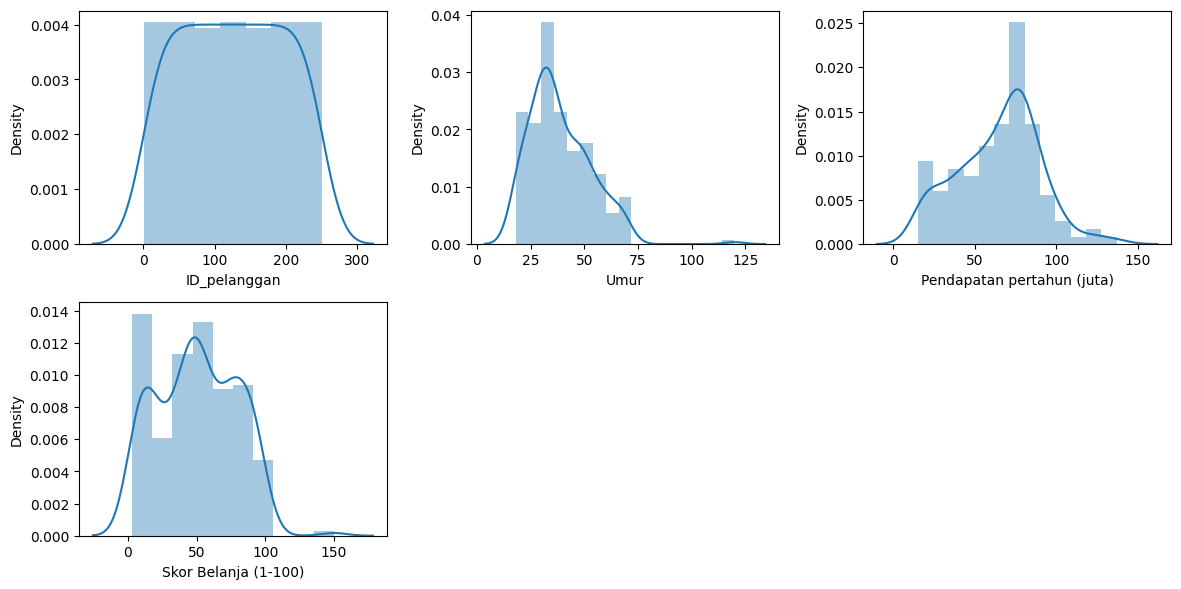

In [12]:
#code here for univariate

plt.figure(figsize=(12, 6))

variables = ['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']

for i, var in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    sns.distplot(df[var])

plt.tight_layout()
plt.show()


**Give your analysis:**

---
Diagram distplot diatas menampilkan 4 visualisasi, yakni ID_pelanggan, Umur, Pendapatan pertahun (juta) dan Skor Belanja (1-100).

---
**ID_pelanggan**\
Tipe data ID_pelanggan sebenarnya adalah nominal, sehingga tidak tepat jika digambarkan secara numerik. Terlihat pada diagram ID_pelanggan, sebaran datanya terpusat dan seragam.

**Umur**\
Umur pada diagram tersebut berbentuk *right skewed*. Artinya, nilai mean lebih besar dari median karena terdapat outlier umur 120 tahun sehingga nilai rata-ratanya akan semakin ditarik ke kanan menjauhi nilai median.

**Pendapatan pertahun**\
Pada Pendapatan pertahun (juta), tampak bahwa data lebih tersebar secara variatif padaa sisi kiri, sedangkan pada sisi kanan cenderung lebih melandai. Artinya, lebih sedikit orang mendapatkan gaji di atas nilai mean.

**Skor Belanja**\
Dikatakan bahwa Skor Belanja (1-100) memiliki standar deviasi yang rendah seperti terlihat pada pola data. Pada data tersebut terlihat outlier di angka 150.



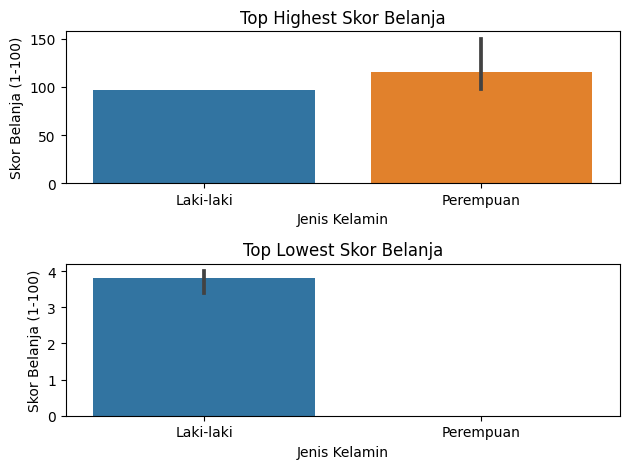

In [13]:
#code here for bivariate

# Top Highest and Lowest Skor Belanja
top_highest = df.nlargest(5, 'Skor Belanja (1-100)')
top_lowest = df.nsmallest(5, 'Skor Belanja (1-100)')

gender_order = df['Jenis Kelamin'].unique()

# Barplot Top Highest Skor Belanja
plt.subplot(2, 1, 1)
sns.barplot(data=top_highest, x='Jenis Kelamin', y='Skor Belanja (1-100)', order=gender_order)
plt.title('Top Highest Skor Belanja')

# BArplot Top lowest Skor Belanja
plt.subplot(2, 1, 2)
sns.barplot(data=top_lowest, x='Jenis Kelamin', y='Skor Belanja (1-100)', order=gender_order)
plt.title('Top Lowest Skor Belanja')

plt.tight_layout()
plt.show()


**Give your analysis:**

---
Diagram barplot di atas menggambarkan 2 visualisasi data berdasarkan kategori Skor Belanja Tertinggi dan Terendah.

---
Secara singkat, diagram tersebut memberi gambaran bahwa pelanggan laki-laki cenderung memiliki Skor Belanja lebih kecil dibanding pelanggan perempuan. Hal tersebut sebenarnya merupakan pengetahuan umum terkait fakta bahwa perempuan lebih suka berbelanja dibandingkan laki-laki.

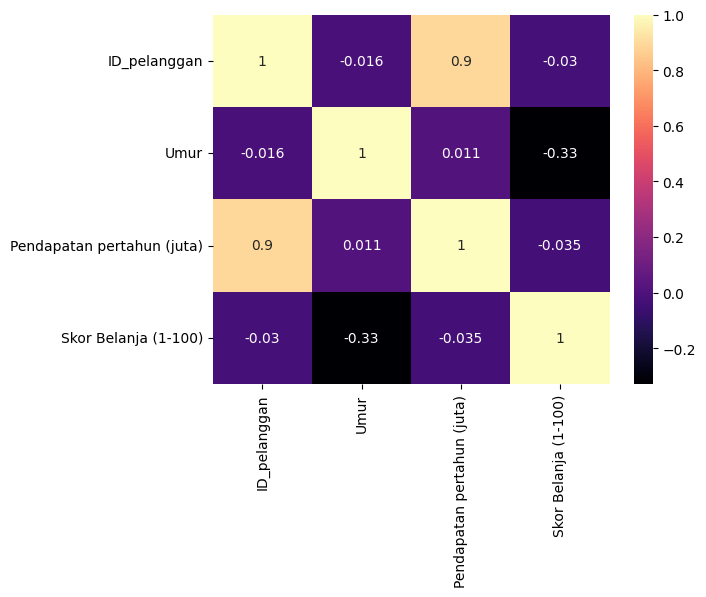

In [14]:
#code here for multivariate

variables_2 = df[['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']]

corr_matrix = variables_2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.show()


**Give your analysis:**

---
Visualisasi di atas merupakan diagram heatmap dengna korelasi antarvariabel. Warna terang menunjukkan adanya korelasi yang kuat, sedangkan warna gelap menunjukkan korelasi yang lemah.

---

**Temuan 1**\
Variabel Umur memiliki korelasi yang lemah dengan Skor Belanja. Artinya, hubungan antarvariabel tersebut adalah negatif.

**Temuan 2**\
Pendapatan pertahun memiliki korelasi paling kuat dengan ID_pelanggan. Sayangnya, hal tersebut tidak memiliki arti karena ID_pelanggan bukan merupakan data numerik.

**Temuan 3**\
Pendapatan pertahun memiliki korelasi lebih besar dengan Umur dibandingkan dengan Skor Belanja. Hal tersebut mengindikasikan adanya hubungan yang lebih positif antara Pendapatan pertahun dengan Umur, seperti semakin besar Pendapatan pertahun seiring dengan pertambahan Umur seseorang. Sedangkan, besar kecilnya Pendapatan kurang mempengaruhi Skor Belanja mereka.

---
Berdasarkan analisis tersebut. Tampak menarik untuk membuat analisis clustering untuk melihat seperti apa pola hubungan antara Umur dan Skor Belanja.


**Expected output**

Univariate plot

![](https://drive.google.com/uc?id=12BSOah7WFzuOEJsKfsaNDw799zzqbDIs)

Bivariate plot

![](https://drive.google.com/file/d/1aNLD2M9a-d63sVkCqN7n475LQ8NqSsi1)

Multivariate plot

![](https://drive.google.com/uc?id=1TTXm3BjoqqwSGMGE1en9ZIJT53Wm5SFf)



---

---



---





# Soal 6. Data scaling
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi menggunakan variabel dataframe setelah handling missing value dan outlier

In [15]:
#code here

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_array = np.array(df2[['Umur', 'Skor Belanja (1-100)']])
data_scaled = scaler.fit_transform(x_array)
data_scaled

array([[-1.45540807e+00, -3.96862497e-01],
       [-1.30503831e+00,  1.12123573e+00],
       [-1.38022319e+00, -1.58965396e+00],
       [-1.15466856e+00,  9.76654949e-01],
       [-5.53189542e-01, -3.60717301e-01],
       [-1.22985343e+00,  9.40509753e-01],
       [-2.52450034e-01, -1.58965396e+00],
       [-1.15466856e+00,  1.59112328e+00],
       [ 1.92791140e+00, -1.69808955e+00],
       [-6.28374419e-01,  7.95928969e-01],
       [ 2.15346603e+00, -1.30049240e+00],
       [-2.52450034e-01,  1.77184926e+00],
       [ 1.47680214e+00, -1.26434720e+00],
       [-1.07948368e+00,  9.76654949e-01],
       [-1.02080280e-01, -1.33663759e+00],
       [-1.22985343e+00,  1.04894534e+00],
       [-1.38022319e+00,  5.79057793e-01],
       [ 1.02569287e+00, -7.58314456e-01],
       [-2.52450034e-01,  1.73570406e+00],
       [-2.52450034e-01, -5.41443281e-01],
       [-1.00429880e+00,  8.32074165e-01],
       [ 5.74583613e-01, -1.62579916e+00],
       [-5.53189542e-01,  8.32074165e-01],
       [ 1.



---



---



---



# Soal 7. Clustering menggunakan k-menas

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

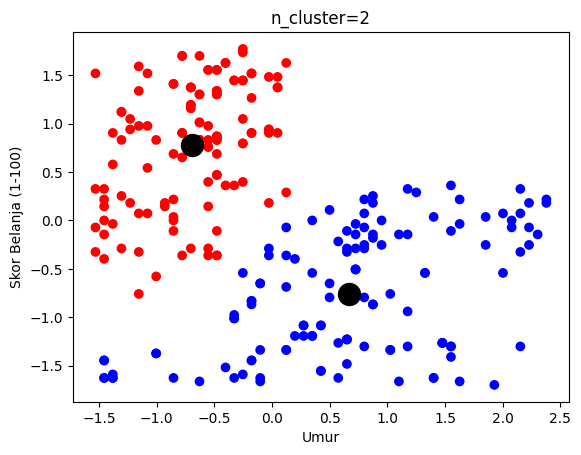

In [16]:
# Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(data_scaled)

colors = ['red', 'blue']
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=[colors[label] for label in kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=250, color='black')

plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('n_cluster=2')
plt.show()

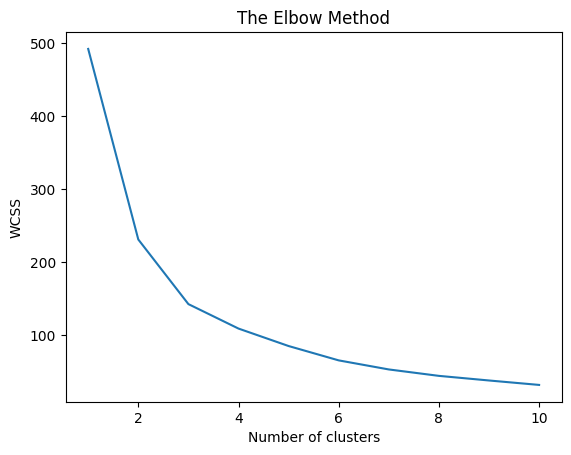

In [17]:
# Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat

sum_of_squared_distances = []
K = range(1,11)
for k in K:
  km = KMeans(n_clusters=k, random_state=42).fit(data_scaled)
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

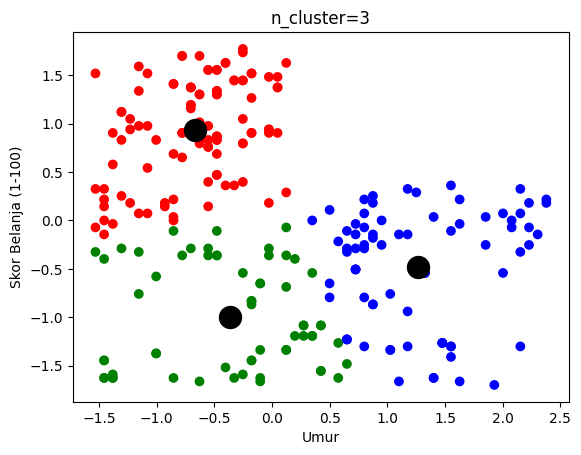

In [18]:
# Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan

kmeans = KMeans(n_clusters=3, random_state=42).fit(data_scaled)

colors = ['blue', 'red', 'green']
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=[colors[label] for label in kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=250, color='black')

plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.title('n_cluster=3')
plt.show()


**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)


In [19]:
#silhoutte score

from sklearn.metrics import silhouette_score

# Menghitung Silhouette Coefficient untuk k = 2
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(data_scaled)
sc_label2 = silhouette_score(data_scaled, kmeans_2.labels_, metric='euclidean')
print(f'jika k bernilai 2, maka SC-nya: {sc_label2}')

# Menghitung Silhouette Coefficient untuk k = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(data_scaled)
sc_label3 = silhouette_score(data_scaled, kmeans_3.labels_, metric='euclidean')
print(f'jika k bernilai 3, maka SC-nya: {sc_label3}')


jika k bernilai 2, maka SC-nya: 0.4854766884293722
jika k bernilai 3, maka SC-nya: 0.46475332972661465




---



---



---



# Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket

Pada tugas_19 tentang clustering sebelumnya, saya telah membuat analisis berdasarkan cluster K=2 karena memiliki nilai silhoutte lebih besar dibandingkan cluster K=3. Pada Tugas Akhir ini, cluster K=3 lebih menarik untuk dibuat. Hal tersebut didasarkan pada nilai silhoutte K=3 tidak jauh berbeda dengan silhoutte K=2. Di samping itu, adanya informasi tambahan berupa fakta bahwa jenis kelamin perempuan memiliki Skor Belanja lebih tinggi dibandingkan laki-laki pada poin analisis bivariate.

Pada clustering K=3 ditemukan 3 klaster pelanggan supermarket yang ditandai dengan warna merah, hijau, dan biru.
1. **Klaster 1 (Merah)**: Kelompok pelanggan berusia lebih tua dengan kecenderungan Skor Belanja lebih rendah
2. **Klaster 2 (Hijau)**: Kelompok pelanggan berusia muda dengan Skor Belanja lebih tinggi (*cenderung didominasi oleh Perempuan*)
3. **Klaster 3 (Biru)**: Kelompok pelanggan berusia muda dengan Skor Belanja lebih rendah (*cenderung didominasi oleh Laki-laki*)

Wawasan tentang segmentasi pelanggan dapat membantu menentukan strategi operasional dan penjualan secara lebih efektif dalam mendorong performa penjualan.